In [108]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
%matplotlib inline

In [109]:
DATA_IN_PATH = 'D:/PBL 스터디/PBL 실습/pbl_data_in/'

In [110]:
test_data = pd.read_csv(DATA_IN_PATH+'clova.csv', header = 0)
test_data.head()

,sentence,start,end
0,이번 신제품 출시에 대한 시장의 반응은 어때. 미친 개 같아.,980,8590
1,시장의 반응이 차가워. 아 그런 젓 같은 일이,9880,15740
2,우린 이제 야근의 연속이겠다. 판매량이 지난번 제품보다는 좋다고는 하는데,17430,26290
3,모르겠다. 뭐가 문제인 걸까. 우리가 엿 같이 한 탓이지.,26480,35740
4,야 야 진정해. 다시 분석해 보자.,37180,40240


In [111]:
test_length = test_data['sentence'].astype(str).apply(len)

Text(0, 0.5, 'Number of review')

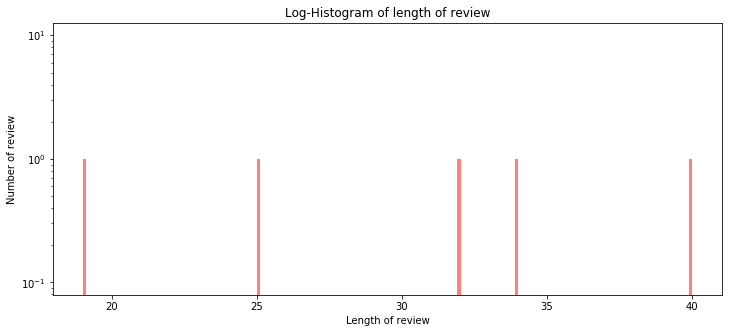

In [112]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(test_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [113]:
print('리뷰 길이 최대 값: {}'.format(np.max(test_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(test_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(test_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(test_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(test_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(test_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(test_length, 75)))
print('리뷰 길이 99.9%: {}'.format(np.percentile(test_length, 99.9)))

리뷰 길이 최대 값: 40
리뷰 길이 최소 값: 19
리뷰 길이 평균 값: 30.00
리뷰 길이 표준편차: 7.29
리뷰 길이 중간 값: 32.0
리뷰 길이 제 1 사분위: 25.0
리뷰 길이 제 3 사분위: 34.0
리뷰 길이 99.9%: 39.976


## train 데이터 가져오기

In [114]:
clean_train_data = pd.read_csv(DATA_IN_PATH + 'real_train_38.csv')
clean_train_sentence = []
clean_train_sentence = clean_train_data['text']
#clean_train_sentence = list(np.array(clean_train_data['text'].tolist()))

In [115]:
array_text = []

for arr in clean_train_data['text']:
    array_text.append(eval(arr))
               
array_text

[['강성범', '자식', '연예계', '퇴', '출시', '케', '야', '되다'],
 ['그렇게', '안', '보다', '상황', '판단', '그렇다', '안되다'],
 ['이재명',
  '당선',
  '되다',
  '박살',
  '안',
  '난대',
  '요',
  '공산주의',
  '화',
  '빈부격차',
  '되다',
  '더',
  '커지다',
  '랏돈',
  '받다',
  '살다',
  '근로',
  '의사',
  '없다',
  '국민',
  '양산',
  '시키다',
  '같다',
  '더',
  '걱정',
  '이다',
  '정치성향',
  '이야',
  '개인',
  '적',
  '취향',
  '이라',
  '이해',
  '하다',
  '한때',
  '방송',
  '에서',
  '유명하다',
  '분',
  '분별',
  '력',
  '과',
  '판단력',
  '약해지다',
  '같다',
  '안타깝다'],
 ['시부', '리지', '말고', '찌그러지다'],
 ['욕설', '유도', '고', '소용', '돈벌이'],
 ['그냥', '맛', '가다'],
 ['ㅋ', '잡', '을', '놈', '들다', '잡아넣다', '이나라', '꼴', 'ㅜㅜ'],
 ['밉다'],
 ['머', '야', '갑작', '튀어나오다', '관심', '받다', '모양', '이네'],
 ['전라', '대', '깨', '표본', '강냉이', '강성범', 'ㅋㅋ', '진짜', '꼴갑', '떤다'],
 ['이나', '라이미', '박살', '나다', '성', '범', '그렇다', '살다'],
 ['오다',
  '연예인',
  '거의',
  '다대',
  '깨물다',
  '얘',
  '네',
  '쉬다',
  '돈버',
  '데',
  '공평하다',
  '세금',
  '열',
  '배정',
  '도',
  '때리다'],
 ['얜또왜이려'],
 ['개그', '가안', '먹히다', '정치', '판', '에', '기웃기웃'],
 ['좌파', '답', '없다', '드', '라'

In [116]:
final_clean_train_sentence = []

for i in range(len(clean_train_sentence)):
    final_clean_train_sentence.append(clean_train_sentence[i])

final_clean_train_sentence

["['강성범', '자식', '연예계', '퇴', '출시', '케', '야', '되다']",
 "['그렇게', '안', '보다', '상황', '판단', '그렇다', '안되다']",
 "['이재명', '당선', '되다', '박살', '안', '난대', '요', '공산주의', '화', '빈부격차', '되다', '더', '커지다', '랏돈', '받다', '살다', '근로', '의사', '없다', '국민', '양산', '시키다', '같다', '더', '걱정', '이다', '정치성향', '이야', '개인', '적', '취향', '이라', '이해', '하다', '한때', '방송', '에서', '유명하다', '분', '분별', '력', '과', '판단력', '약해지다', '같다', '안타깝다']",
 "['시부', '리지', '말고', '찌그러지다']",
 "['욕설', '유도', '고', '소용', '돈벌이']",
 "['그냥', '맛', '가다']",
 "['ㅋ', '잡', '을', '놈', '들다', '잡아넣다', '이나라', '꼴', 'ㅜㅜ']",
 "['밉다']",
 "['머', '야', '갑작', '튀어나오다', '관심', '받다', '모양', '이네']",
 "['전라', '대', '깨', '표본', '강냉이', '강성범', 'ㅋㅋ', '진짜', '꼴갑', '떤다']",
 "['이나', '라이미', '박살', '나다', '성', '범', '그렇다', '살다']",
 "['오다', '연예인', '거의', '다대', '깨물다', '얘', '네', '쉬다', '돈버', '데', '공평하다', '세금', '열', '배정', '도', '때리다']",
 "['얜또왜이려']",
 "['개그', '가안', '먹히다', '정치', '판', '에', '기웃기웃']",
 "['좌파', '답', '없다', '드', '라', '거짓', '날조', '펴다', '라', '잇다']",
 "['이구만', '코', '메다', '가문', '닫다', '정치', '판', '에', '빌붙다', '살

## 전처리 진행

In [117]:
import re
from soynlp.normalizer import *
def cleanse(text):
    pattern = re.compile(r'\s+')
    text = re.sub(pattern, ' ', str(text))
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ0-9]', '', str(text))
    return text

def preprocessing(sentence, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # sentence : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    sentence_text = repeat_normalize(sentence, num_repeats=2)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    wd_sentence = okt.morphs(sentence_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        wd_sentence = [token for token in wd_sentence if not token in stop_words]
        
   
    return wd_sentence

In [118]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()

In [119]:
test_data['sentence'] = test_data['sentence'].apply(cleanse)

In [120]:
clean_test_sentence = []

for review in test_data['sentence']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_sentence.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_sentence.append([])  #string이 아니면 비어있는 값 추가
        
clean_test_onlysentence_df = pd.DataFrame({'sentence':clean_test_sentence})

In [121]:
clean_test_sentence

[['이번', '신제품', '출시', '에', '대', '시장', '반응', '어떻다', '미치다', '개', '같다'],
 ['시장', '반응', '차갑다', '그런', '젓', '같다', '일이'],
 ['우린', '이제야', '근', '의연', '속이다', '판매량', '이지', '난번', '제품', '보다는', '좋다', '하다'],
 ['모르다', '뭐', '문제', '인걸', '끄다', '우리', '엿', '같', '탓', '이지'],
 ['야야', '진정하다', '분석', '해보다']]

In [122]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(array_text) ###only train data만 단어사전에 
test_sequences = tokenizer.texts_to_sequences(clean_test_sentence)

word_vocab = tokenizer.word_index # 단어 사전 형태
# word_vocab["<PAD>"] = 0

MAX_SEQUENCE_LENGTH = 38 #문장 최대 길이, 중간값 지정

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') #test data 벡터화

In [123]:
test_inputs

array([[  462,  7463,  1393,     2,    68,  1425,  1601,   158,    71,
           35,     8,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 1425,  1601,  1692,   327,  2974,     8,   484,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 5619,  6148,   689,  1991, 22196,   137, 22424,  2497,  1326,
           20,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   59,    49,   178,  2193,   151,   298,  1182,  4835,   809,
        

## 저장

In [124]:
DATA_IN_PATH = 'D:/PBL 스터디/PBL 실습/pbl_data_in/'
from collections import OrderedDict

TEST_INPUT_DATA = 'clova_test_input_38.npy'
TEST_CLEAN_DATA = 'clova_test_clean.csv'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
clean_test_onlysentence_df.to_csv(DATA_IN_PATH +TEST_CLEAN_DATA, index = False)